In [1]:
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass
from pyFlame.config import Config
from pyFlame.flame_solver import FlameSolver
from pyFlame.strain import ConstantStrain, OscillatingStrain, RampedStrain
from pyFlame.integrators import IntegratorType, IntegratorAPI
from pyFlame.utils.plot import *

In [2]:
# Create configuration
config = Config(
    # Chemistry setup
    mechanism="gri30.yaml",
    fuel="CH4",
    oxidizer="O2:1.0, N2:3.76",
    phi=1.0,  # Stoichiometric
    
    # Domain setup
    x_min=-0.02,  # 2
    x_max=0.02,  # 2 cm domain
    grid_points=100,
    dt_min = 1e-6,
    dt_max = 1e-4,
    # Flame configuration
    flame_type="diffusion",  # Diffusion flame
    T_fuel=600.0,        # Cold fuel
    T_oxidizer=600.0,   # Hot oxidizer - high enough to ensure ignition
    pressure=101325.0,  # 1 atm
    fuel_left=True,  # Fuel on the left
    
    # Solver settings
    dt=1e-6,  # Initial timestep
    t_start=0.0,
    t_end=0.1,  # Run for 0.1 seconds
    rel_tol=1e-6,
    abs_tol=1e-8,
    
    # Grid adaptation
    adaptation_interval=10,
    grad_tol=0.2,
    curv_tol=0.02,
    flame_res=0.1,
    
    # strain rate
    strain_function=ConstantStrain(100),  # 10 1/s strain rate
    
    default_integrator = "RK23",
    integrator_api = IntegratorAPI.SOLVE_IVP,
    
    use_mixing_layer=False,
    mixing_width=0.002,  # 2mm mixing layer
    use_ignition_zone=False,
    ignition_width=0.001,  # 1mm ignition zone
    ignition_T_peak=1000,   # +300K temperature peak
    
    use_cantera=False,
    use_parallel=False,
)

In [3]:
# Create solver
solver = FlameSolver(config)

In [4]:
# Solve
print("Solving flame...")
success = solver.solve()


Solving flame...


/Users/elotech/Documents/CODES/SCI-ML/oneDFlameSolver/pyFlame/pyFlame/grid.py:246: RuntimeWarning: divide by zero encountered in divide
  grad_T = np.abs(dTdx) / (T_range / (self.x[-1] - self.x[0]))
/Users/elotech/Documents/CODES/SCI-ML/oneDFlameSolver/pyFlame/pyFlame/grid.py:246: RuntimeWarning: invalid value encountered in divide
  grad_T = np.abs(dTdx) / (T_range / (self.x[-1] - self.x[0]))
/Users/elotech/Documents/CODES/SCI-ML/oneDFlameSolver/pyFlame/pyFlame/grid.py:247: RuntimeWarning: divide by zero encountered in divide
  curv_T = np.abs(d2Tdx2) / (T_range / (self.x[-1] - self.x[0])**2)
/Users/elotech/Documents/CODES/SCI-ML/oneDFlameSolver/pyFlame/pyFlame/grid.py:247: RuntimeWarning: invalid value encountered in divide
  curv_T = np.abs(d2Tdx2) / (T_range / (self.x[-1] - self.x[0])**2)
/Users/elotech/.virtualenvs/mlEnv/lib/python3.11/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:214: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve 

t = 1.0000e-04 s - max T = 600.00 K - dt = 2.00e-06 s - flame speed = -2.00e+00 m/s
Grid quality: {'min_dx': 0.0004040404040403997, 'max_dx': 0.00040404040404040664, 'mean_dx': 0.00040404040404040404, 'grid_points_in_flame': 99}
Conservation errors: {'mass_flux_error': -2.7983528525971786, 'species_sum_error': 2.220446049250313e-16}
{'total_heat_release': 1.3694302123335856e-07, 'peak_heat_release': 0.00029969253789359485, 'flame_thickness': 0.0004040824459945971, 'max_temperature': 600.0000049607934, 'max_temperature_gradient': 0.012276742438643877, 'max_temperature_gradient_location': -0.02, 'mid_point_temperature': 600.0000000000682, 'H2O_mass_fraction at mid-point': 6.556981628810059e-16}
t = 2.0000e-04 s - max T = 600.01 K - dt = 2.00e-06 s - flame speed = -2.02e-02 m/s
Grid quality: {'min_dx': 0.0004040404040403997, 'max_dx': 0.00040404040404040664, 'mean_dx': 0.00040404040404040404, 'grid_points_in_flame': 99}
Conservation errors: {'mass_flux_error': -2.798352854111894, 'species

In [5]:
solver.t_end

0.1

In [6]:
solver.t

0.011384909232507739

In [7]:
data = {
            'times': np.array(solver.history.times, dtype=object),
            'T': np.array(solver.history.T, dtype=object),
            'U': np.array(solver.history.U, dtype=object),
            'Y': np.array(solver.history.Y, dtype=object),
            'x': np.array(solver.history.x, dtype=object),
            'rho': np.array(solver.history.rho, dtype=object),
            'cp': np.array(solver.history.cp, dtype=object),
            'heat_release': np.array(solver.history.heat_release, dtype=object)
        }

# save data
np.savez('data.npz', **data)

In [10]:
solver.history.Y[0][13, :]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

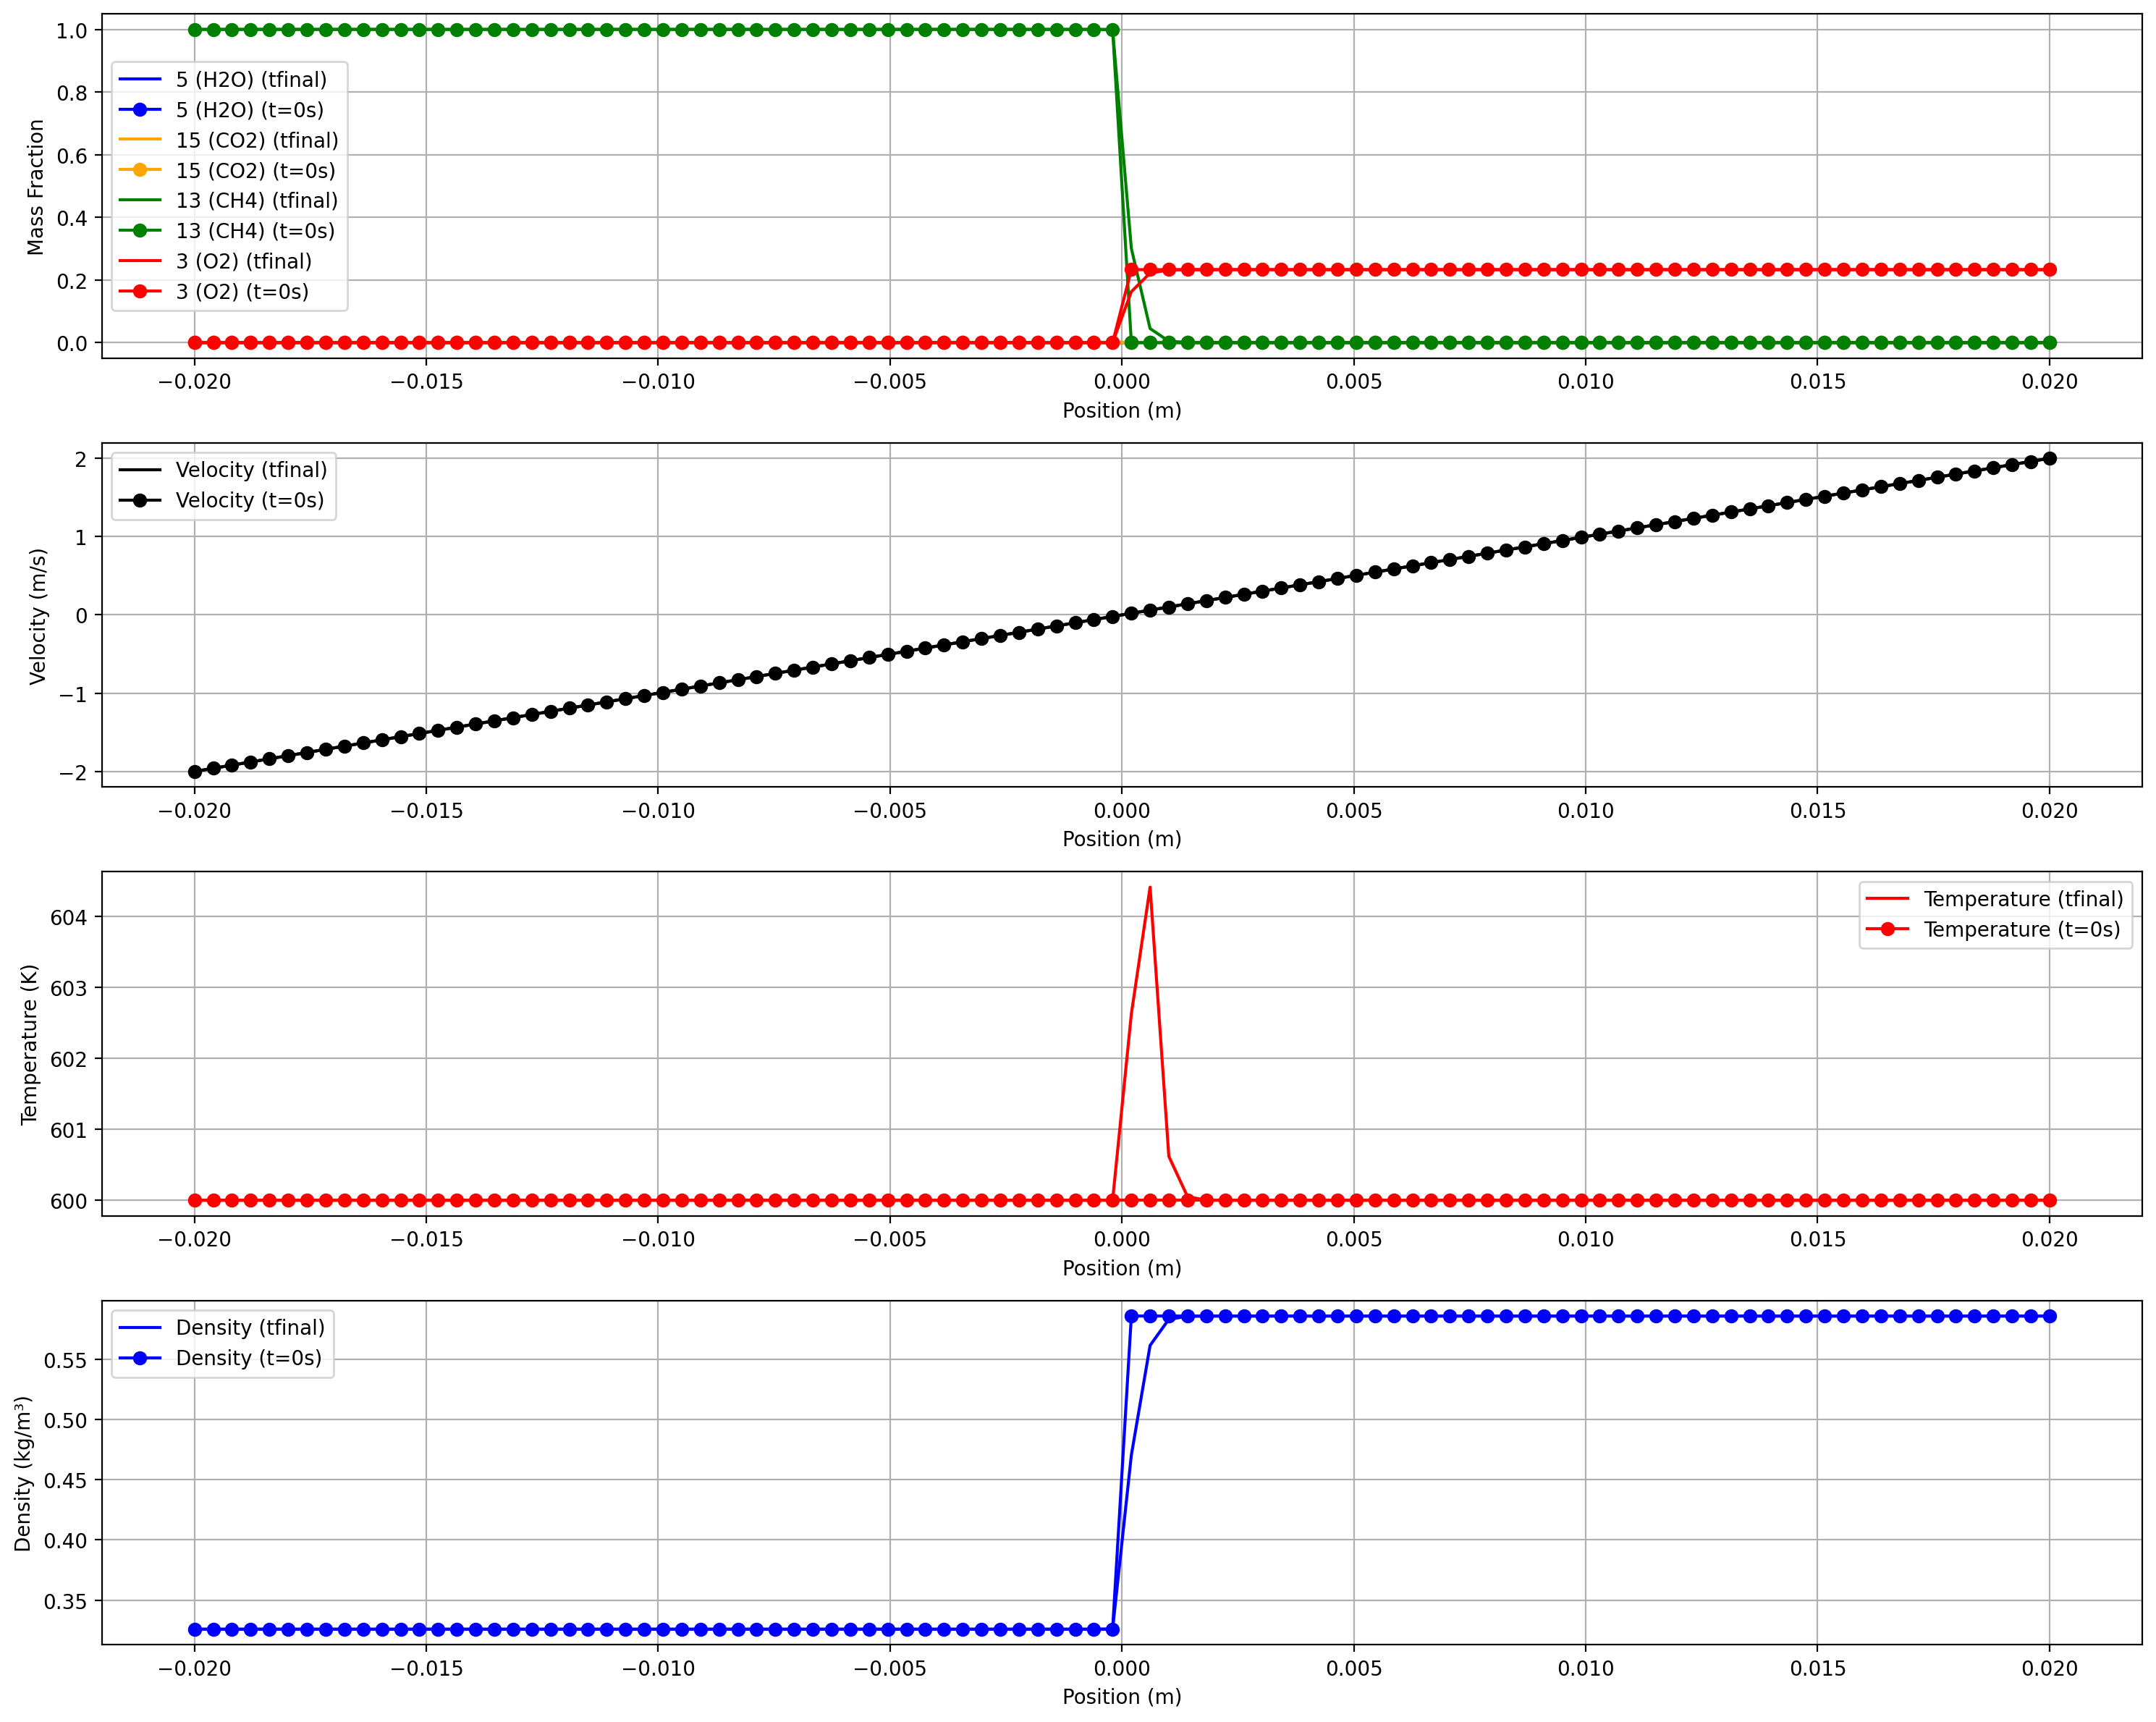

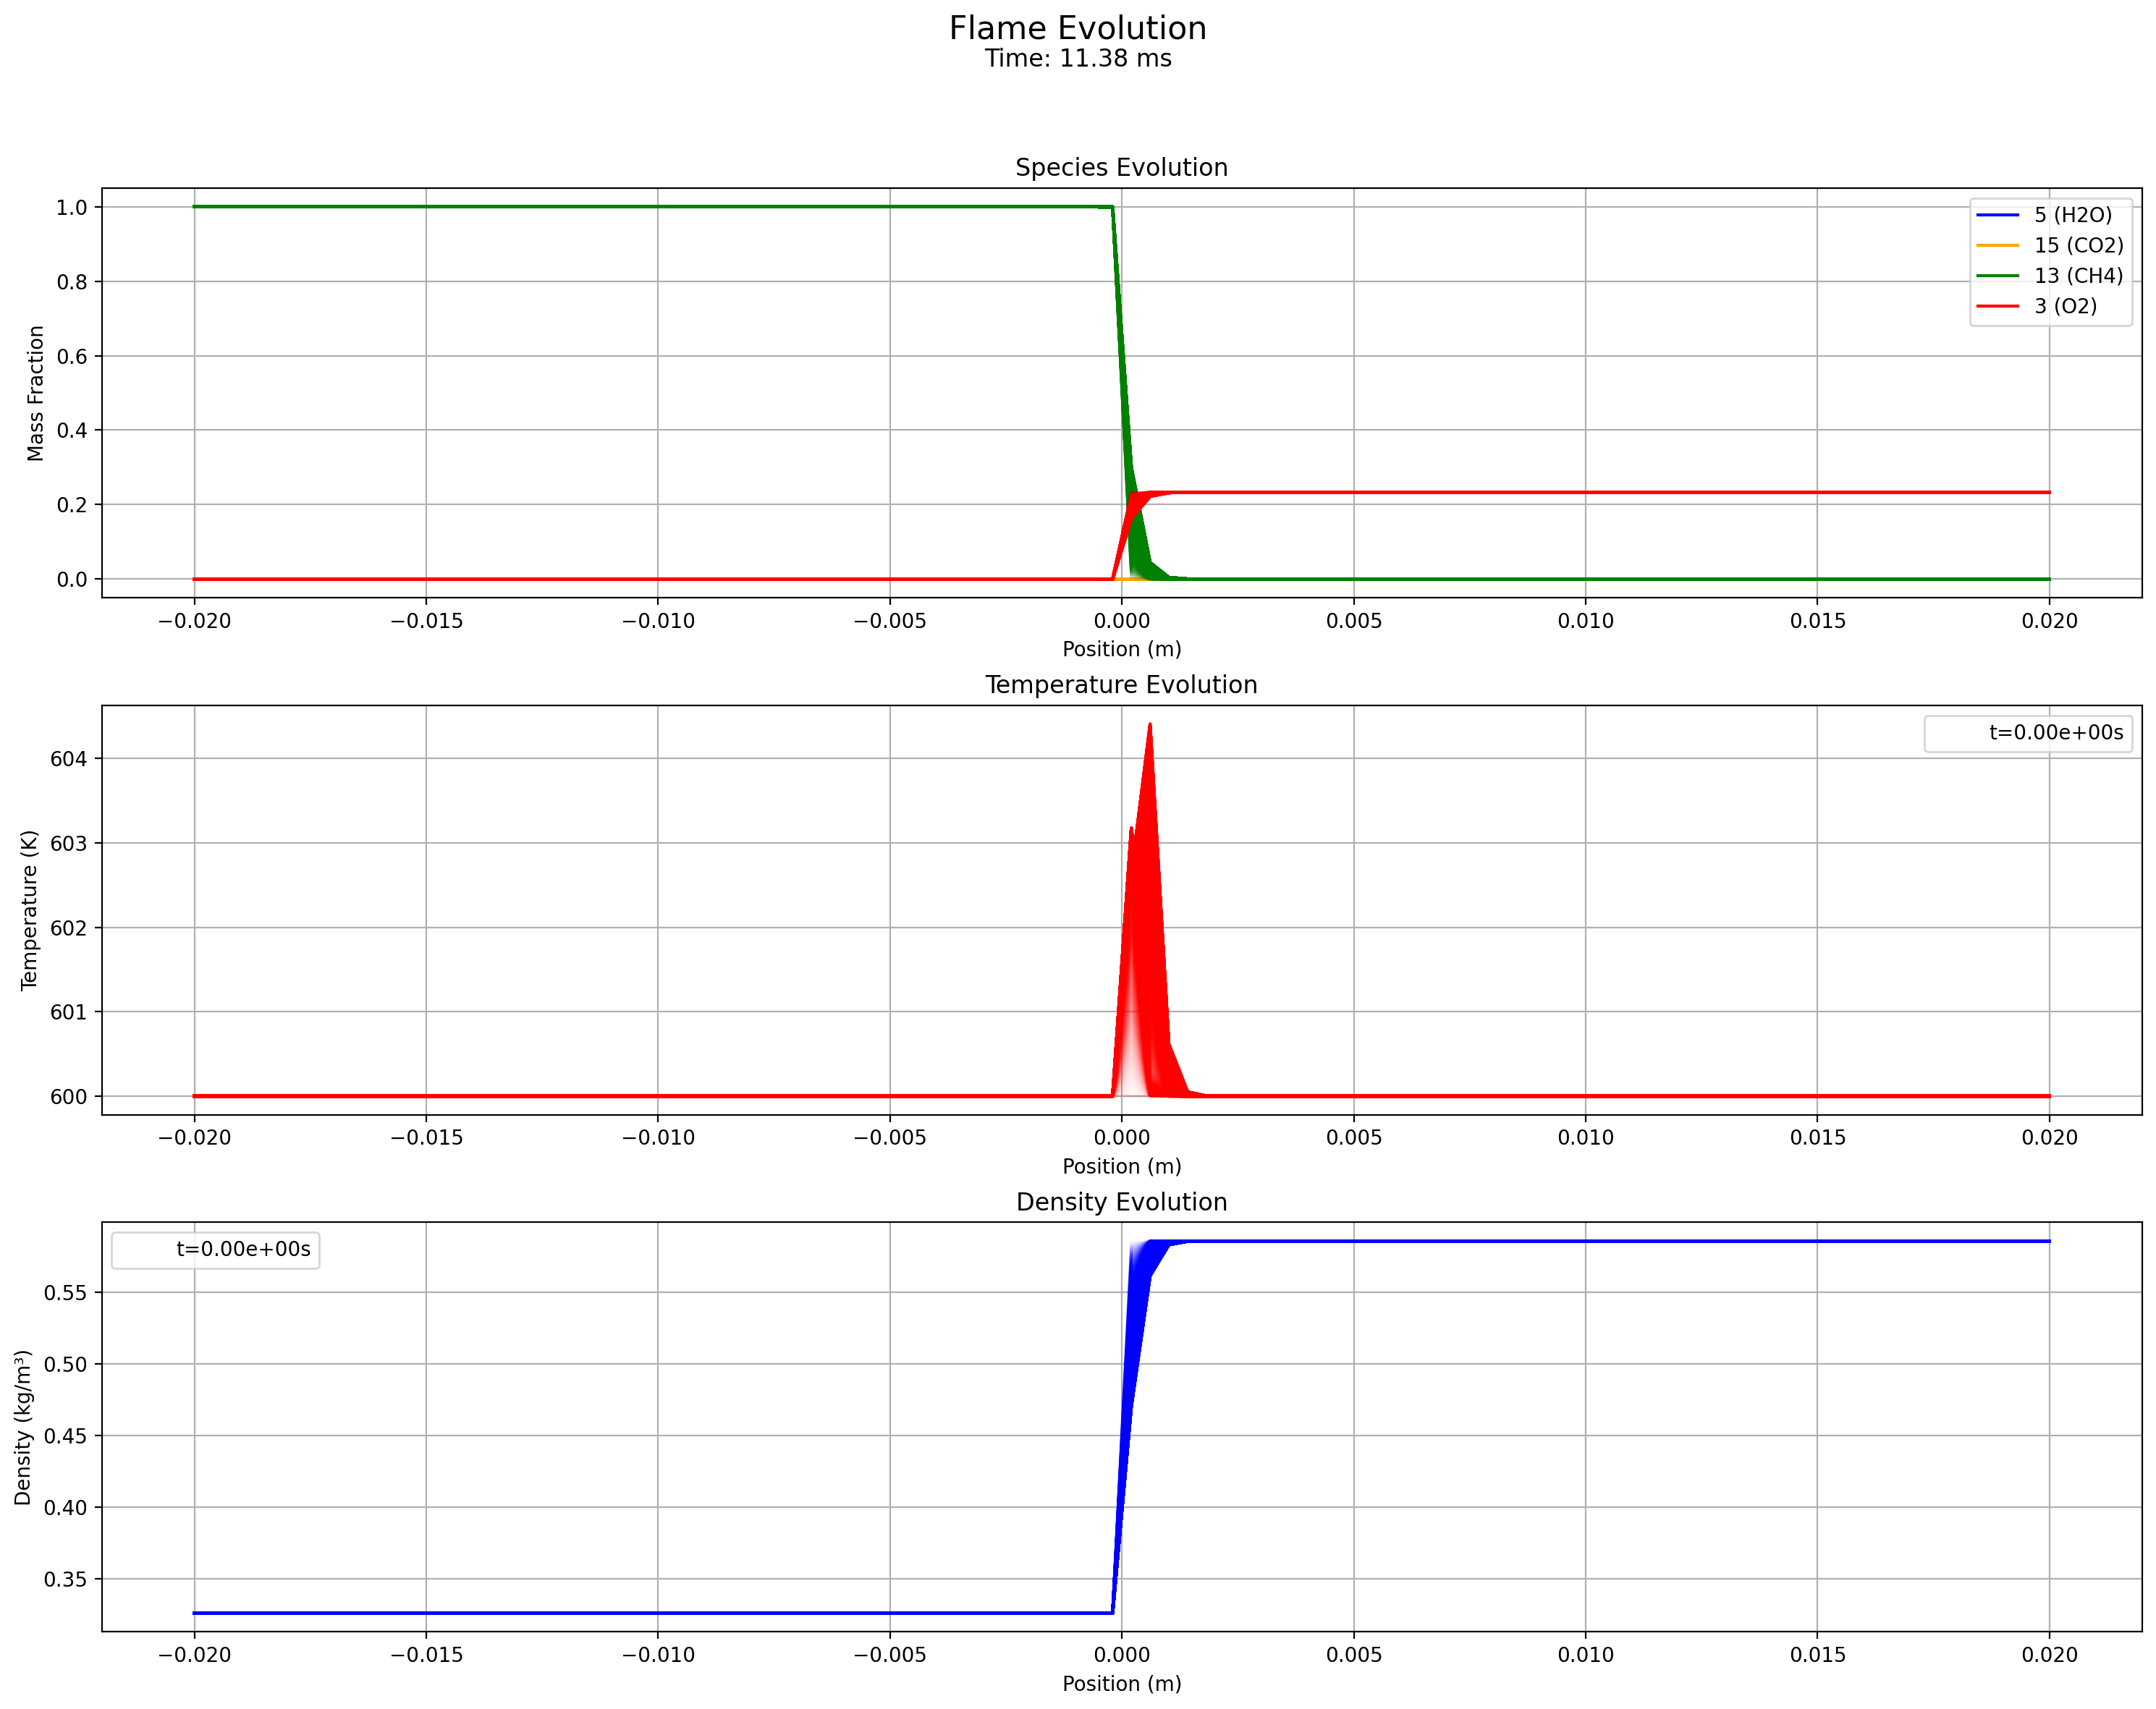

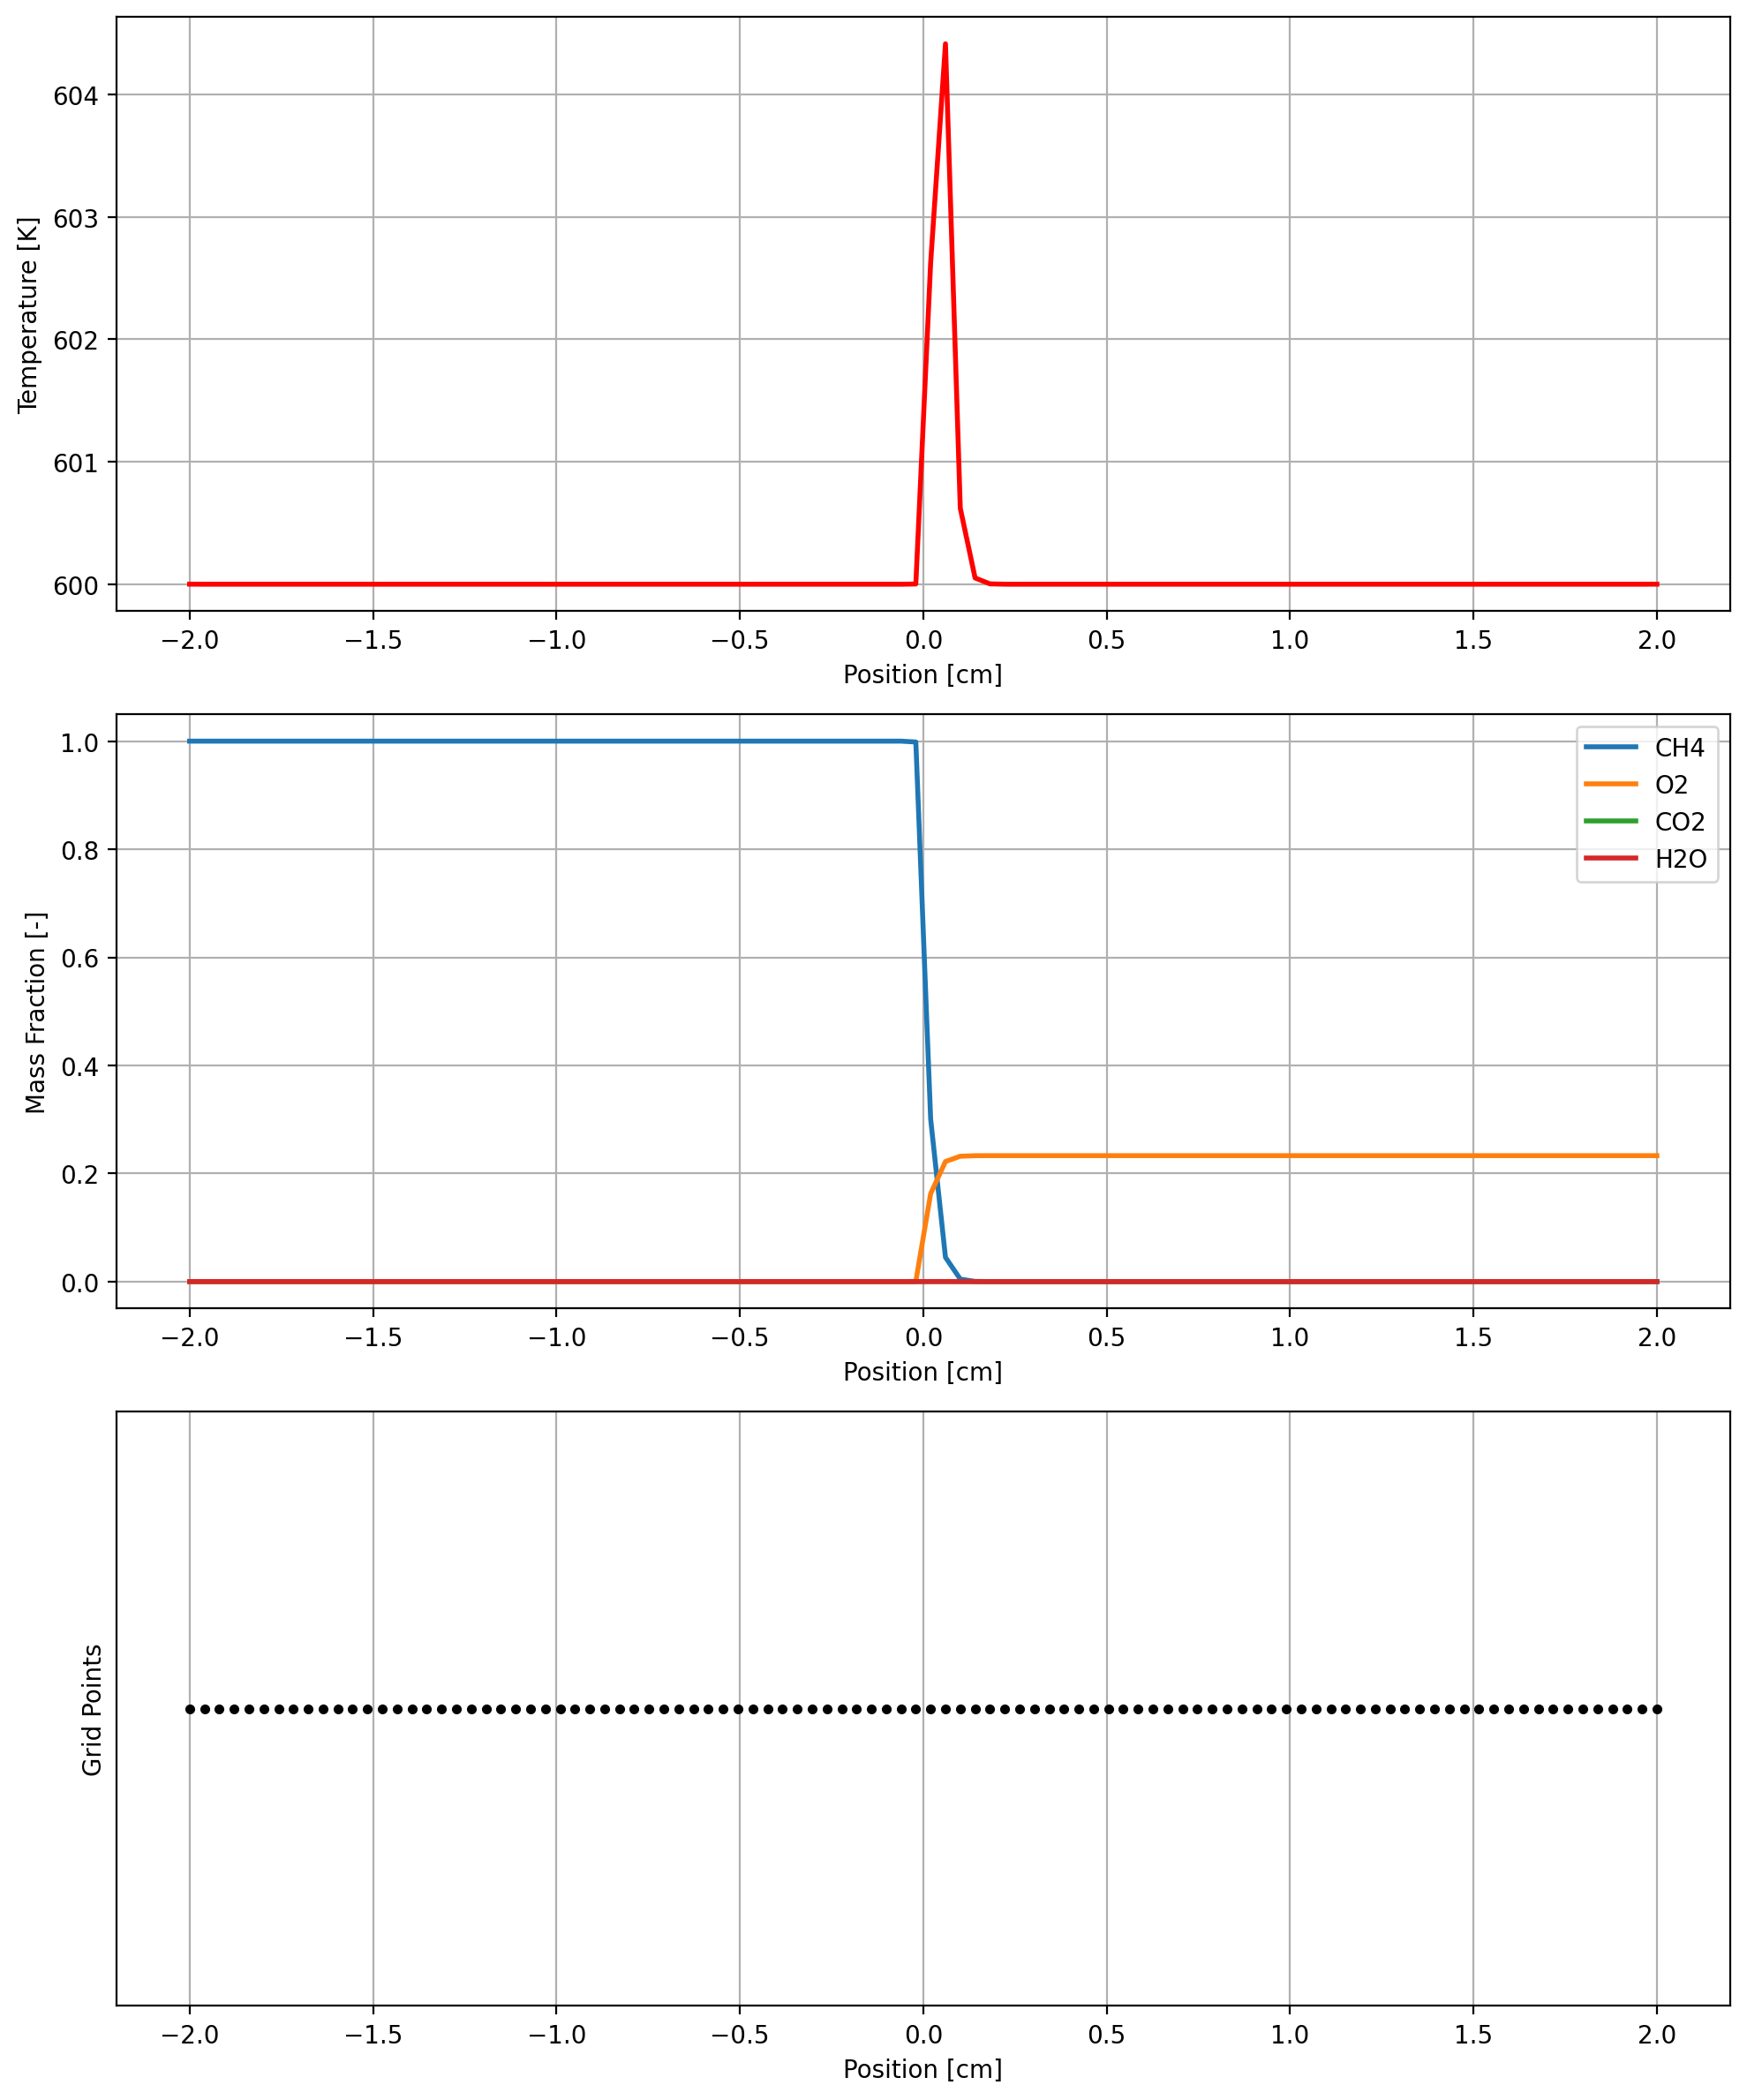


Simulation Statistics:
Final time: 1.138e-02 s
Number of grid points: 100
Number of grid adaptations: 0
Maximum temperature: 604.4 K
Flame position: 0.02 cm


In [7]:
species_to_plot = ['H2O', 'CO2', 'CH4', 'O2']
plot_results(solver, species_to_plot, save_path="successful_rk23.png")
plot_evolution(solver, species_to_plot, save_path="successful_rk23_evolution.png")
plot_results_(solver)

In [5]:
def plot_evolution(solver, species_to_plot=None, save_path=None):
    """Plot the evolution of temperature, species, and density with adaptive grid"""
    plt.figure(figsize=(15, 12), dpi=200)
    plt.suptitle('Flame Evolution', fontsize=16)

    history = solver.history
    
    # Create a reference grid for interpolation (use last grid point)
    x_ref = history.x[-1]

    # Add timestamp text
    time_text = plt.figtext(0.5, 0.95, f'Time: {history.times[-1]*1000:.2f} ms', 
                           ha='center', fontsize=12, wrap=True)

    # Plot species evolution
    plt.subplot(3, 1, 1)
    if species_to_plot is None:
        # Default to first two species
        species_to_plot = [0, 1]
    
    specie_names = solver.gas.species_names
    colors = ['b', 'orange', 'g', 'r']
    for k, spec_names in enumerate(species_to_plot):
        spec_idx = solver.gas.species_index(spec_names)
        for i, (Y, x) in enumerate(zip(history.Y, history.x)):
            alpha = (i + 1) / len(history.Y)
            
            # # Interpolate to reference grid if grid sizes don't match
            # if len(x) != len(x_ref):
            #     interp = interp1d(x, Y[spec_idx], kind='linear', bounds_error=False, 
            #                     fill_value='extrapolate')
            #     y_plot = interp(x_ref)
            #     x_plot = x_ref
            # else:
            y_plot = Y[spec_idx]
            x_plot = x
            
            if i == len(history.Y) - 1:
                label = f"{spec_idx} ({specie_names[spec_idx]})"
            else:
                label = None
            plt.plot(x_plot, y_plot, color=colors[k], alpha=alpha, label=label)

    plt.xlabel('Position (m)')
    plt.ylabel('Mass Fraction')
    plt.legend()
    plt.grid(True)
    plt.title('Species Evolution')

    # Plot temperature evolution
    plt.subplot(3, 1, 2)
    for i, (T, x) in enumerate(zip(history.T, history.x)):
        alpha = (i + 1) / len(history.T)
        
        # # Interpolate if needed
        # if len(x) != len(x_ref):
        #     interp = interp1d(x, T, kind='linear', bounds_error=False, 
        #                     fill_value='extrapolate')
        #     T_plot = interp(x_ref)
        #     x_plot = x_ref
        # else:
        T_plot = T
        x_plot = x
            
        plt.plot(x_plot, T_plot, 'r-', alpha=alpha, 
                 label=f't={history.times[i]:.2e}s' if i == 0 else None)

    plt.xlabel('Position (m)')
    plt.ylabel('Temperature (K)')
    plt.legend()
    plt.grid(True)
    plt.title('Temperature Evolution')

    # Plot density evolution
    plt.subplot(3, 1, 3)
    for i, (rho, x) in enumerate(zip(history.rho, history.x)):
        alpha = (i + 1) / len(history.rho)
        
    # # Interpolate if needed
    # if len(x) != len(x_ref):
    #     interp = interp1d(x, rho, kind='linear', bounds_error=False, 
    #                     fill_value='extrapolate')
    #     rho_plot = interp(x_ref)
    #     x_plot = x_ref
    # else:
        rho_plot = rho
        x_plot = x
            
        plt.plot(x_plot, rho_plot, 'b-', alpha=alpha, 
                 label=f't={history.times[i]:.2e}s' if i == 0 else None)

    plt.xlabel('Position (m)')
    plt.ylabel('Density (kg/m³)')
    plt.legend()
    plt.grid(True)
    plt.title('Density Evolution')

    plt.tight_layout()
    plt.subplots_adjust(top=0.88)
    
    if save_path:
        plt.savefig(save_path)
    plt.show()

In [ ]:
plot_evolution(solver, species_to_plot)